In [84]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import re

In [85]:
# Change this path to your actual file location
file_path = r"C:\Users\jagadeesh02.TRN\Desktop\Project Details\trading_bot_dataset_with_user_profiles.csv"

# Load CSV
df = pd.read_csv(file_path)

# Display preview
df.head()


,Interaction ID,Timestamp,User Query,Intent Detected,Bot Response,Response Time (ms),Prediction Accuracy (%),Entity Extraction Accuracy (%),User Sentiment,User Feedback,Conversation Success,User ID,User Type,Region,Device Type,Account Age (months),Is Premium
0,1,1/28/2020 14:41,What is your prediction for Bonds?,Financial Advice,"BTC is bullish, buying recommended.",150,95,90,Neutral,Needs improvement,Failed,U10166,Retail,Asia,Tablet,43,False
1,2,11/26/2020 11:59,What is your prediction for Forex?,Price Check,"ETH has a downward trend, selling might be an ...",155,94,91,Positive,Helpful,Successful,U10030,Retail,South America,Desktop,9,False
2,3,9/6/2021 17:10,Any news on Gold?,Stock Prediction,Stock market shows mixed signals today.,160,93,92,Positive,Helpful,Successful,U10253,Institutional,Asia,Mobile,4,True
3,4,9/14/2022 16:14,Should I buy or sell WTI?,Strategy Advice,Forex market indicates a strong USD.,165,92,93,Positive,Helpful,Successful,U10255,Retail,Europe,Mobile,49,False
4,5,11/6/2023 11:40,What's the trend with Tesla?,Strategy Advice,Diversifying might reduce your risk.,170,91,94,Positive,Helpful,Successful,U10085,Retail,North America,Desktop,25,False


In [86]:
# Extract numeric part of User ID
df["UserID_Num"] = df["User ID"].apply(lambda x: int(re.search(r'\d+', str(x)).group()))

# Assign Flow A if even, B if odd
df["Assigned_Flow"] = df["UserID_Num"].apply(lambda x: "A" if x % 2 == 0 else "B")


In [87]:
# Convert "Conversation Success" to binary
df["Success_Flag"] = df["Conversation Success"].apply(lambda x: 1 if str(x).strip().lower() == "successful" else 0)



In [88]:
# Group by Assigned Flow and compute counts
grouped = df.groupby("Assigned_Flow")["Success_Flag"].agg(["sum", "count"]).reset_index()
grouped.columns = ["Assigned_Flow", "Success_Count", "Total_Users"]


In [89]:
display(grouped)

,Assigned_Flow,Success_Count,Total_Users
0,A,318,518
1,B,282,482


In [90]:
# Run two-proportion z-test
z_stat, p_value = proportions_ztest(count=grouped["Success_Count"], nobs=grouped["Total_Users"])

# Add to result
grouped["Z_Statistic"] = z_stat
grouped["P_Value"] = p_value


In [91]:
display(z_stat)

np.float64(0.9301189155540287)

In [92]:
display(p_value)

np.float64(0.35230951804780153)

In [93]:
print("📊 A/B Test Result Based on Conversation Success:")
print(grouped)

# Optional: Simple significance test interpretation
if p_value < 0.05:
    print("✅ Significant difference detected between A and B flows.")
else:
    print("ℹ️ No significant difference detected between A and B flows.")


📊 A/B Test Result Based on Conversation Success:
  Assigned_Flow  Success_Count  Total_Users  Z_Statistic  P_Value
0             A            318          518     0.930119  0.35231
1             B            282          482     0.930119  0.35231
ℹ️ No significant difference detected between A and B flows.


Bar Chart – Success Count per Flow


C:\Users\jagadeesh02.TRN\AppData\Local\Temp\ipykernel_11832\1782612026.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Assigned_Flow", y="Success_Rate", data=ab_results, palette="Set2")
C:\Users\jagadeesh02.TRN\AppData\Local\Temp\ipykernel_11832\1782612026.py:23: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jagadeesh02.TRN\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


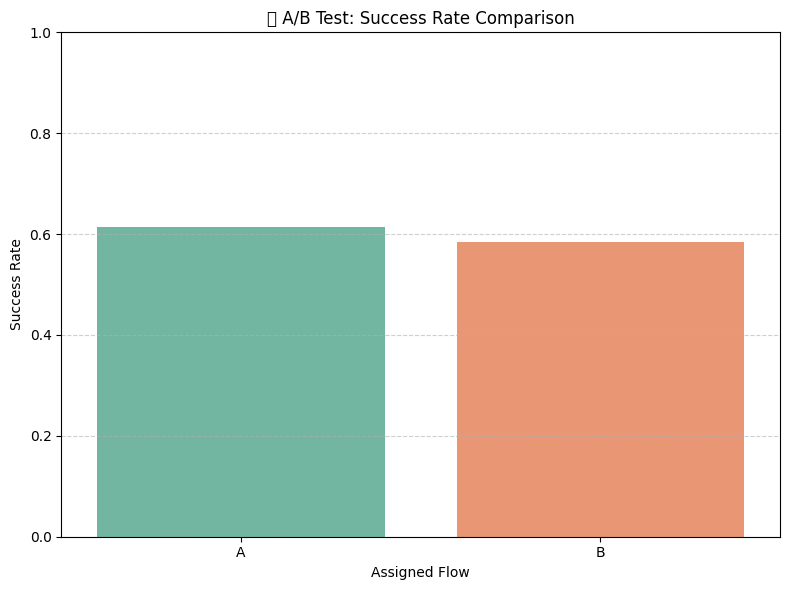

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Final A/B test result (manually entered from your output or from your code)
ab_results = pd.DataFrame({
    "Assigned_Flow": ["A", "B"],
    "Success_Count": [318, 282],
    "Total_Users": [518, 482],
    "P_Value": [0.35231, 0.35231]
})

# Add success rate for each group
ab_results["Success_Rate"] = ab_results["Success_Count"] / ab_results["Total_Users"]

# Bar chart: Success Rate
plt.figure(figsize=(8, 6))
sns.barplot(x="Assigned_Flow", y="Success_Rate", data=ab_results, palette="Set2")
plt.title("✅ A/B Test: Success Rate Comparison")
plt.ylabel("Success Rate")
plt.ylim(0, 1)
plt.xlabel("Assigned Flow")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Pie Chart Distribution

C:\Users\jagadeesh02.TRN\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129489 (\N{ADULT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jagadeesh02.TRN\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129309 (\N{HANDSHAKE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


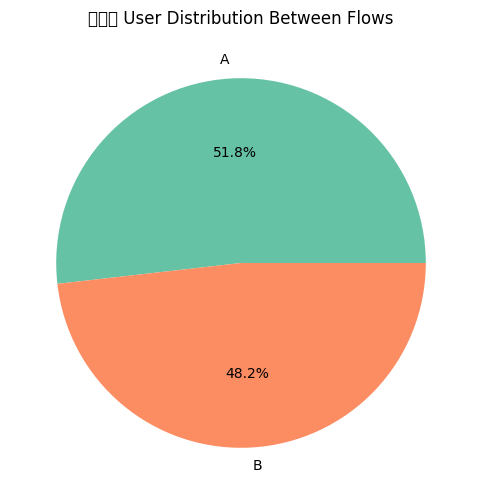

In [95]:
# Pie chart: User distribution
plt.figure(figsize=(6, 6))
plt.pie(
    ab_results["Total_Users"],
    labels=ab_results["Assigned_Flow"],
    autopct='%1.1f%%',
    colors=["#66c2a5", "#fc8d62"]
)
plt.title("🧑‍🤝‍🧑 User Distribution Between Flows")
plt.show()


Annotated Summary Table Plot

In [96]:
# Display summary with color-coded p-value interpretation
def highlight_significance(val):
    return 'color: red;' if val < 0.05 else 'color: green;'

ab_results_display = ab_results[["Assigned_Flow", "Success_Count", "Total_Users", "Success_Rate", "P_Value"]]
ab_results_display.style.applymap(highlight_significance, subset=["P_Value"]).format({
    "Success_Rate": "{:.2%}",
    "P_Value": "{:.5f}"
})


C:\Users\jagadeesh02.TRN\AppData\Local\Temp\ipykernel_11832\2201687692.py:6: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  ab_results_display.style.applymap(highlight_significance, subset=["P_Value"]).format({


,Assigned_Flow,Success_Count,Total_Users,Success_Rate,P_Value
0,A,318,518,61.39%,0.35231
1,B,282,482,58.51%,0.35231


Add Auto-Deployment Logic if >X% improvement

In [100]:
# Threshold for automatic deployment (e.g., 5% improvement)
threshold = 0.05

# Calculate relative improvement
rate_a = ab_results.loc[ab_results['Assigned_Flow'] == 'A', 'Success_Rate'].values[0]
rate_b = ab_results.loc[ab_results['Assigned_Flow'] == 'B', 'Success_Rate'].values[0]

# Compare and deploy winner if improvement is significant
if abs(rate_a - rate_b) / min(rate_a, rate_b) > threshold and p_value < 0.05:
    winning_flow = 'A' if rate_a > rate_b else 'B'
    print(f"🚀 Deploying flow {winning_flow} as it shows >{threshold*100}% improvement with statistical significance.")
else:
    print("📉 No sufficient improvement. Keeping both flows active.")


📉 No sufficient improvement. Keeping both flows active.


In [103]:
from pyspark.sql.functions import avg

# 🔍 1. Add Response Time and Sentiment to analysis per flow
metrics_df = df.groupBy("Assigned_Flow").agg(
    spark_sum("Success_Flag").alias("Success_Count"),
    spark_count("Success_Flag").alias("Total_Users"),
    avg("Response Time (ms)").alias("Avg_Response_Time"),
    avg("User Sentiment").alias("Avg_Sentiment")  # Assumes sentiment is numeric (e.g., -1 to 1 or 1–5)
)

metrics_df = metrics_df.withColumn("Success_Rate", col("Success_Count") / col("Total_Users"))
metrics_df.show()

# 2️⃣ Export subgroup analysis (User Type, Region, Device Type)
subgroup_cols = ["User Type", "Region", "Device Type"]

for col_name in subgroup_cols:
    subgroup = df.groupBy(col_name, "Assigned_Flow").agg(
        spark_sum("Success_Flag").alias("Success_Count"),
        spark_count("Success_Flag").alias("Total_Users")
    ).withColumn("Success_Rate", col("Success_Count") / col("Total_Users"))
    
    export_path = f"C:\\Users\\jagadeesh02.TRN\\Desktop\\Project Details\\ab_test1_subgroup_{col_name.replace(' ', '_')}.csv"
    subgroup.toPandas().to_csv(export_path, index=False)
    print(f"📁 Exported subgroup analysis for {col_name} → {export_path}")

# 🛑 3. Auto-end A/B test logic
total_users = df.select("User ID").distinct().count()
min_required_users = 1000  # example threshold

if total_users >= min_required_users:
    if p_value < 0.05 and relative_improvement > threshold:
        print(f"✅ Test complete: flow '{winning_flow}' shows significant improvement. Recommend deployment.")
    else:
        print("⚠️ Test complete but no clear winner. Recommend further iteration or testing with different metric.")
else:
    print(f"⏳ Test in progress: only {total_users}/{min_required_users} users collected.")


+-------------+-------------+-----------+------------------+-------------+------------------+
|Assigned_Flow|Success_Count|Total_Users| Avg_Response_Time|Avg_Sentiment|      Success_Rate|
+-------------+-------------+-----------+------------------+-------------+------------------+
|            B|          282|        482|172.99792531120332|         NULL|0.5850622406639004|
|            A|          318|        518|172.03667953667954|         NULL|0.6138996138996139|
+-------------+-------------+-----------+------------------+-------------+------------------+

📁 Exported subgroup analysis for User Type → C:\Users\jagadeesh02.TRN\Desktop\Project Details\ab_test1_subgroup_User_Type.csv
📁 Exported subgroup analysis for Region → C:\Users\jagadeesh02.TRN\Desktop\Project Details\ab_test1_subgroup_Region.csv
📁 Exported subgroup analysis for Device Type → C:\Users\jagadeesh02.TRN\Desktop\Project Details\ab_test1_subgroup_Device_Type.csv
⏳ Test in progress: only 292/1000 users collected.


Multivariate A/B Test (e.g., A1, A2, B1) with PySpark

In [104]:
from pyspark.sql.functions import rand, when, col, lit

# Assign users randomly to 3 groups: A1, A2, B1
df = df.withColumn(
    "Assigned_MultiFlow",
    when(rand() < 0.33, lit("A1"))
    .when(rand() < 0.66, lit("A2"))
    .otherwise(lit("B1"))
)

# Flag success as before
df = df.withColumn("Success_Flag", when(col("Conversation Success") == "Successful", 1).otherwise(0))

# Aggregate success counts per multivariate flow
multi_grouped = df.groupBy("Assigned_MultiFlow").agg(
    spark_sum("Success_Flag").alias("Success_Count"),
    spark_count("Success_Flag").alias("Total_Users")
).withColumn("Success_Rate", col("Success_Count") / col("Total_Users"))

multi_grouped.show()


+------------------+-------------+-----------+------------------+
|Assigned_MultiFlow|Success_Count|Total_Users|      Success_Rate|
+------------------+-------------+-----------+------------------+
|                A2|          276|        448|0.6160714285714286|
|                B1|          132|        219|0.6027397260273972|
|                A1|          192|        333|0.5765765765765766|
+------------------+-------------+-----------+------------------+



Predictive Flow Assignment Using MLlib (Binary Classification Example)

In [105]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

# Prepare label: Success_Flag (already created)
# Features: encode User Type, Region, Device Type and use Response Time
indexers = [
    StringIndexer(inputCol=col_name, outputCol=col_name + "_idx")
    for col_name in ["User Type", "Region", "Device Type"]
]

assembler = VectorAssembler(
    inputCols=["User Type_idx", "Region_idx", "Device Type_idx", "Response Time (ms)"],
    outputCol="features"
)

lr = LogisticRegression(featuresCol="features", labelCol="Success_Flag")

pipeline = Pipeline(stages=indexers + [assembler, lr])

# Split train/test
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)

# Fit model
model = pipeline.fit(train_df)

# Predict success probability (can help assign flows likely to succeed)
predictions = model.transform(test_df)
predictions.select("User ID", "Assigned_Flow", "probability", "prediction").show(5)


+-------+-------------+--------------------+----------+
|User ID|Assigned_Flow|         probability|prediction|
+-------+-------------+--------------------+----------+
| U10253|            B|[0.43217216423394...|       1.0|
| U10081|            B|[0.35093986070554...|       1.0|
| U10044|            A|[0.30758774073525...|       1.0|
| U10104|            A|[0.42636149510919...|       1.0|
| U10112|            A|[0.36595037147007...|       1.0|
+-------+-------------+--------------------+----------+
only showing top 5 rows



Visualization Script with matplotlib & seaborn from Exported Data

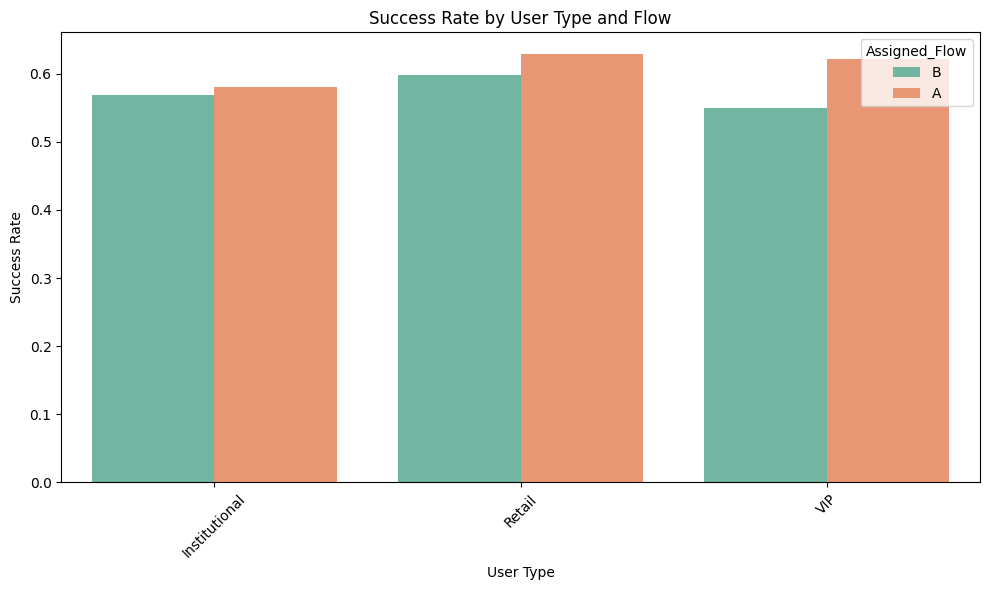

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load subgroup export CSV example
user_type_df = pd.read_csv(r"C:\Users\jagadeesh02.TRN\Desktop\Project Details\ab_test1_subgroup_User_Type.csv")

# Barplot Success Rate by User Type and Flow
plt.figure(figsize=(10,6))
sns.barplot(data=user_type_df, x="User Type", y="Success_Rate", hue="Assigned_Flow", palette="Set2")
plt.title("Success Rate by User Type and Flow")
plt.ylabel("Success Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Multivariate A/B Test – Statistical Comparison

1. Export the multivariate success data to pandas

In [108]:
# Export from Spark to Pandas
multi_pd = multi_grouped.toPandas()

# Display
print("Multivariate A/B Test Summary:")
print(multi_pd)


Multivariate A/B Test Summary:
  Assigned_MultiFlow  Success_Count  Total_Users  Success_Rate
0                 A2            276          448      0.616071
1                 B1            132          219      0.602740
2                 A1            192          333      0.576577


2. Chi-Square Test Across All Variants (A1 vs A2 vs B1)

In [110]:
from scipy.stats import chi2_contingency
import numpy as np

# Build contingency table: rows = groups, cols = [success, failure]
contingency = np.array([
    [row["Success_Count"], row["Total_Users"] - row["Success_Count"]]
    for _, row in multi_pd.iterrows()
])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency)

print("\n🔍 Chi-Square Test Across All Groups:")
print(f"Chi2 Stat: {chi2_stat:.4f}, p-value: {p_val:.5f}")

if p_val < 0.05:
    print("✅ Significant difference found across groups.")
else:
    print("ℹ️ No significant difference across groups.")



🔍 Chi-Square Test Across All Groups:
Chi2 Stat: 1.2503, p-value: 0.53519
ℹ️ No significant difference across groups.


Pairwise Proportion Z-Tests (e.g., A1 vs A2, A1 vs B1)

In [111]:
from statsmodels.stats.proportion import proportions_ztest

# Define a helper to run z-test between two flows
def ztest_between(df, flow1, flow2):
    group1 = df[df["Assigned_MultiFlow"] == flow1]
    group2 = df[df["Assigned_MultiFlow"] == flow2]
    
    count = [group1["Success_Count"].values[0], group2["Success_Count"].values[0]]
    nobs = [group1["Total_Users"].values[0], group2["Total_Users"].values[0]]
    
    z_stat, p_val = proportions_ztest(count, nobs)
    print(f"\n📊 Z-Test: {flow1} vs {flow2}")
    print(f"Z-Statistic: {z_stat:.4f}, P-Value: {p_val:.5f}")
    if p_val < 0.05:
        print("✅ Statistically significant difference.")
    else:
        print("ℹ️ No significant difference.")

# Run pairwise comparisons
ztest_between(multi_pd, "A1", "A2")
ztest_between(multi_pd, "A1", "B1")
ztest_between(multi_pd, "A2", "B1")



📊 Z-Test: A1 vs A2
Z-Statistic: -1.1139, P-Value: 0.26534
ℹ️ No significant difference.

📊 Z-Test: A1 vs B1
Z-Statistic: -0.6108, P-Value: 0.54136
ℹ️ No significant difference.

📊 Z-Test: A2 vs B1
Z-Statistic: 0.3318, P-Value: 0.74007
ℹ️ No significant difference.


In [115]:
from pyspark.sql.functions import col, sum as spark_sum, count as spark_count

subgroup_cols = ["User Type", "Region", "Device Type"]

for subgroup in subgroup_cols:
    subgroup_df = df.groupBy("Assigned_Flow", subgroup) \
        .agg(
            spark_sum("Success_Flag").alias("Success_Count"),
            spark_count("Success_Flag").alias("Total_Users")
        ) \
        .withColumn("Success_Rate", col("Success_Count") / col("Total_Users"))

    # Convert to Pandas for easier export/analysis
    pandas_subgroup_df = subgroup_df.toPandas()

    # Save to CSV for stakeholder review
    export_path = f"C:\\Users\\jagadeesh02.TRN\\Desktop\\Project Details\\ab_test1_subgroup_{subgroup.replace(' ', '_')}.csv"
    pandas_subgroup_df.to_csv(export_path, index=False)
    print(f"📁 Exported subgroup analysis for {subgroup} → {export_path}")


📁 Exported subgroup analysis for User Type → C:\Users\jagadeesh02.TRN\Desktop\Project Details\ab_test1_subgroup_User_Type.csv
📁 Exported subgroup analysis for Region → C:\Users\jagadeesh02.TRN\Desktop\Project Details\ab_test1_subgroup_Region.csv
📁 Exported subgroup analysis for Device Type → C:\Users\jagadeesh02.TRN\Desktop\Project Details\ab_test1_subgroup_Device_Type.csv


In [116]:
# Assume 'grouped_df' has aggregated success counts and totals per flow

# Calculate success rates for each flow
pandas_results = grouped_df.toPandas()
rate_a = pandas_results.loc[pandas_results['Assigned_Flow'] == 'A', 'Success_Rate'].values[0]
rate_b = pandas_results.loc[pandas_results['Assigned_Flow'] == 'B', 'Success_Rate'].values[0]

# Define a minimum relative improvement threshold (e.g., 5%)
threshold = 0.05  

# Use p_value from your z-test (make sure you have it stored)
if abs(rate_a - rate_b) / min(rate_a, rate_b) > threshold and p_value < 0.05:
    winning_flow = "A" if rate_a > rate_b else "B"
    print(f"🚀 Deploying flow {winning_flow} as it shows >{threshold*100}% improvement with statistical significance.")
else:
    print("📉 No sufficient improvement. Keeping both flows active for further testing.")


📉 No sufficient improvement. Keeping both flows active for further testing.


In [117]:
from pyspark.sql.functions import avg

response_time_df = df.groupBy("Assigned_Flow") \
    .agg(
        avg("Response Time (ms)").alias("Avg_Response_Time")
    )

response_time_df.show()

# You can similarly compute average User Sentiment if it’s numeric or map sentiments to scores
# For example, convert "Positive" -> 1, "Neutral" -> 0, "Negative" -> -1 (if applicable)


+-------------+------------------+
|Assigned_Flow| Avg_Response_Time|
+-------------+------------------+
|            B|172.99792531120332|
|            A|172.03667953667954|
+-------------+------------------+



In [118]:
# Export main aggregated success data
export_main_path = "C:\\Users\\jagadeesh02.TRN\\Desktop\\Project Details\\ab_test1_main_results.csv"
pandas_results.to_csv(export_main_path, index=False)
print(f"📁 Exported main A/B test results → {export_main_path}")


📁 Exported main A/B test results → C:\Users\jagadeesh02.TRN\Desktop\Project Details\ab_test1_main_results.csv
